<a href="https://colab.research.google.com/github/ivanshauck/used-motorcycle-pricing/blob/main/Motorcycle_pricing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The purpose of this project is to build a model that can accurately price used craigslist motorcycles, so that people can go online, input various specs they're looking for, and get a reliable price estimate. My data came from craigslist, using a web crawler that I wrote based on an article from a data scientist who did something similar for used cars. (web crawler link: https://colab.research.google.com/drive/1O8R555OEiLGOXd10piuYCX4XUhZmN1F6), (article link: https://medium.com/mlearning-ai/a-step-by-step-how-to-do-a-data-science-project-with-craigslist-data-part-2-website-scraping-d352351655ee).

I start off by uploading the scraped data that I saved in json format, two files that I upload into data frames and then concatenate to create a single frame.

In [1]:
import pandas as pd

import csv
import json
mo1 = pd.read_json('/content/moto_data_part1.json')
mo2 = pd.read_json('/content/moto_data_part2.json')



In [2]:
data = pd.concat([mo1,mo2],axis=0)

In [3]:
data.head()

,VIN,city,condition,date time,engine displacement (CC),fuel,lat,long,odometer,paint color,price,title status,transmission,type,year make model
0,None,losangeles,None,2022-06-17 06;46,NaN,other,33.141686,-117.186232,25449.0,None,23999.0,clean,other,None,2018 Harley-Davidson FLHTCU - Electra
1,None,losangeles,None,2022-06-17 06;30,NaN,other,33.141686,-117.186232,8025.0,None,17787.0,clean,other,None,2020 Harley-Davidson FLHT - Electra G
2,None,losangeles,excellent,2022-06-17 06;16,NaN,gas,42.463300,-71.011100,25297.0,None,10000.0,None,manual,None,2000 harley davidson
3,None,losangeles,excellent,2022-06-17 02;39,NaN,gas,34.143500,-118.126600,9800.0,None,8000.0,clean,automatic,touring,2001 harley davidson FLSTFI
4,65FLH3487,losangeles,excellent,2022-06-17 01;06,1600.0,gas,34.034200,-118.305000,33000.0,brown,31000.0,clean,manual,cruiser,1965 harley davidson panhead


As we see the initial data has records on 19,246 different used motorcycles for sale. The relevant categorical variables that will be used will be the city the bike is being sold in, the condition, the type of fuel the bike uses, the paint color, the title status, the transmission type, the type of motorcycle, and the make. And the relevant continous variables will be engine displacement in CC's, the latitude the bike is being sold in, the age of the motorcycle, and the miles on the motorcycle to date (odometer).

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19246 entries, 0 to 9536
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   VIN                       5918 non-null   object 
 1   city                      19246 non-null  object 
 2   condition                 12166 non-null  object 
 3   date time                 19246 non-null  object 
 4   engine displacement (CC)  8361 non-null   float64
 5   fuel                      19067 non-null  object 
 6   lat                       19179 non-null  float64
 7   long                      19179 non-null  float64
 8   odometer                  19006 non-null  float64
 9   paint color               13003 non-null  object 
 10  price                     19246 non-null  float64
 11  title status              15770 non-null  object 
 12  transmission              19089 non-null  object 
 13  type                      9533 non-null   object 
 14  year ma

The next task is to take the "year make model" column and extract the year built as well as the make. We will also try to extract as many model types as possible.

In [5]:
data['years'] = data['year make model'].str[0:4]
data['years']
data = data[pd.to_numeric(data['years'],errors = 'coerce').notnull()]



In [6]:
data['years'] = data['years'].astype(str).astype(int)

In [7]:


my_list = []
for record in data['year make model']:
  list0 = record.split()
  
  try:
    my_list.append(list0[1].lower())
  except:
    my_list.append('none')
a_list = []
for record in data['year make model']:
  list1 = record.split()

  try:
    if list1[2].lower() == 'davidson':
      a_list.append(list1[3].lower())
    else:
      a_list.append(list1[2].lower())
  except:
    a_list.append('none')

data['model'] = a_list



my_list
data['make'] = my_list
print(data['make'])
print(data['model'])

0       harley-davidson
1       harley-davidson
2                harley
3                harley
4                harley
             ...       
9532    harley-davidson
9533    harley-davidson
9534    harley-davidson
9535             yamaha
9536             harley
Name: make, Length: 16562, dtype: object
0        flhtcu
1          flht
2          none
3        flstfi
4       panhead
         ...   
9532      flhcs
9533     street
9534    touring
9535     raider
9536      night
Name: model, Length: 16562, dtype: object


Next I take the makes that were written into craigslist as "harley-davidson" and convert them to just "harley" since they are the same thing.

In [8]:
data['model'].value_counts()

none         1139
road          428
street        375
ninja         372
softail       341
             ... 
vbb             1
dominator       1
wr              1
yzfr1           1
tourer          1
Name: model, Length: 1872, dtype: int64

In [9]:
pd.set_option('display.max_rows',None)
data['make'].value_counts()
data.loc[data['make']=='harley-davidson', 'make'] = 'harley'
data.loc[data['make']=='hd', 'make'] = 'harley'
data['make'].value_counts()


harley                4589
honda                 2209
kawasaki              1576
yamaha                1551
suzuki                 951
bmw                    728
ktm                    582
triumph                575
ducati                 519
indian                 211
husqvarna              182
aprilia                112
victory                103
can-am                  93
royal                   85
vespa                   78
kayo                    67
moto                    62
ssr                     57
zero                    56
beta                    49
freedom                 47
genuine                 44
piaggio                 43
tao                     41
apollo                  40
mv                      36
polaris                 34
trailmaster             32
kymco                   31
can                     29
electric                29
custom                  28
2005                    25
lance                   25
cf                      23
benelli                 22
2

In [10]:
data = data.loc[data['model']!='none']

My next step was to create an age column, which is just the current year (2022), minus the year built. I also decided to only work with the makes that had at least 50 motorcycles for sale in the data, this is because make is a significant determinant of price, the models with little representation wouldn't be properly priced by the model. This led to working with 19 manufacturers: harley-davidson, honda, kawasaki, susuki, bmw, ktm, ducati, triumph, husqvarna, indian, aprilia, victory, can-am, royal, kayo, vespa, moto, ssr, and zero. This brings the number of rows down to 13,607.

In [11]:
data['age'] = 2022 - data['years']
makes = ['harley','honda','kawasaki','suzuki','bmw','ktm','ducati','triumph','husqvarna','indian','aprilia',
         'victory','can-am','royal','kayo','vespa','moto','zero','yamaha']

data1 = data[data['make'].isin(makes)]
data1.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 13607 entries, 0 to 9536
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   VIN                       5493 non-null   object 
 1   city                      13607 non-null  object 
 2   condition                 8962 non-null   object 
 3   date time                 13607 non-null  object 
 4   engine displacement (CC)  6194 non-null   float64
 5   fuel                      13513 non-null  object 
 6   lat                       13544 non-null  float64
 7   long                      13544 non-null  float64
 8   odometer                  13469 non-null  float64
 9   paint color               10402 non-null  object 
 10  price                     13607 non-null  float64
 11  title status              12749 non-null  object 
 12  transmission              13537 non-null  object 
 13  type                      6993 non-null   object 
 14  year ma

Next up I'll begin working on filling missing values for the categorical variables with the mode from each column.

In [12]:
condition_mode = data['condition'].mode()
fuel_mode = data['fuel'].mode()
paint_mode = data['paint color'].mode()
title_mode = data['title status'].mode()
type_mode = data['type'].mode()
transmission_mode = data['transmission'].mode()
print(condition_mode)
print(fuel_mode)
print(paint_mode)
print(title_mode)
print(type_mode)
print(transmission_mode)
data1['condition'] = data1['condition'].fillna('excellent')
data1['fuel'] = data1['fuel'].fillna('gas')
data1['paint color'] = data1['paint color'].fillna('black')
data1['title status'] = data1['title status'].fillna('clean')
data1['type'] = data1['type'].fillna('cruiser')
data1['transmission'] = data1['transmission'].fillna('manual')


0    excellent
Name: condition, dtype: object
0    gas
Name: fuel, dtype: object
0    black
Name: paint color, dtype: object
0    clean
Name: title status, dtype: object
0    cruiser
Name: type, dtype: object
0    manual
Name: transmission, dtype: object


<ipython-input-12-1669dc9c732b>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['condition'] = data1['condition'].fillna('excellent')
<ipython-input-12-1669dc9c732b>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['fuel'] = data1['fuel'].fillna('gas')
<ipython-input-12-1669dc9c732b>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

Next I label encode the categorical variables, and fill the latitude and odometer columns with the mean from each column. For CC's I take average CC's for each type of motorcycle, and each row that has a missing value for CC's gets the average value for their type of motorcycle filled in. This is because CC's has many missing values, but is an important variable, and therefore filling the missing values in with just the mean of the whole column didn't seem suitable.

In [13]:
data2 = data1.copy()
city_means = data2.groupby('city')['price'].mean()
data2['city_enc'] = data2['city'].map(city_means)
condition_means = data2.groupby('condition')['price'].mean()
data2['condition_enc'] = data2['condition'].map(condition_means)
fuel_means = data2.groupby('fuel')['price'].mean()
data2['fuel_enc'] = data2['fuel'].map(fuel_means)
paint_means = data2.groupby('paint color')['price'].mean()
data2['paint_enc'] = data2['paint color'].map(paint_means)
title_means = data2.groupby('title status')['price'].mean()
data2['title_enc'] = data2['title status'].map(title_means)
transmission_means = data2.groupby('transmission')['price'].mean()
data2['transmission_enc'] = data2['transmission'].map(transmission_means)
type_means = data2.groupby('type')['price'].mean()
data2['type_enc'] = data2['type'].map(type_means)
make_means = data2.groupby('make')['price'].mean()
data2['make_enc'] = data2['make'].map(make_means)
model_means = data2.groupby('model')['price'].mean()
data2['model_enc'] = data2['model'].map(model_means)
type_cc_means = data2.groupby('type')['engine displacement (CC)'].mean()
data2['cc_type_means'] = data2['type'].map(type_cc_means)



data2['engine displacement (CC)'] = data2['engine displacement (CC)'].fillna(data2['cc_type_means'])
    

  
data2['odometer'] = data2['odometer'].fillna(data2['odometer'].mean())

data2['lat'] = data2['lat'].fillna(data2['lat'].mean())
data2['engine displacement (CC)']
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13607 entries, 0 to 9536
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   VIN                       5493 non-null   object 
 1   city                      13607 non-null  object 
 2   condition                 13607 non-null  object 
 3   date time                 13607 non-null  object 
 4   engine displacement (CC)  13607 non-null  float64
 5   fuel                      13607 non-null  object 
 6   lat                       13607 non-null  float64
 7   long                      13544 non-null  float64
 8   odometer                  13607 non-null  float64
 9   paint color               13607 non-null  object 
 10  price                     13607 non-null  float64
 11  title status              13607 non-null  object 
 12  transmission              13607 non-null  object 
 13  type                      13607 non-null  object 
 14  year ma

In [14]:
data2.corr()

,engine displacement (CC),lat,long,odometer,price,years,age,city_enc,condition_enc,fuel_enc,paint_enc,title_enc,transmission_enc,type_enc,make_enc,model_enc,cc_type_means
engine displacement (CC),1.000000,0.036793,0.100202,0.006057,0.220855,0.066209,-0.066209,0.056769,0.113692,0.070298,0.098868,0.081951,0.067606,0.473218,0.222831,0.260982,0.553454
lat,0.036793,1.000000,0.175390,-0.003954,-0.047917,-0.064898,0.064898,-0.372181,-0.020095,0.006774,0.016074,-0.004265,-0.117428,0.027536,-0.003649,-0.048549,0.034998
long,0.100202,0.175390,1.000000,-0.006541,-0.002267,-0.016866,0.016866,0.020366,0.009283,0.075645,0.056219,0.027054,-0.047569,0.130566,0.052727,0.031012,0.136554
odometer,0.006057,-0.003954,-0.006541,1.000000,-0.025751,-0.088532,0.088532,-0.003814,-0.022954,-0.015783,-0.011542,-0.052561,-0.011279,0.007447,-0.001026,-0.009041,0.020373
price,0.220855,-0.047917,-0.002267,-0.025751,1.000000,0.382403,-0.382403,0.152442,0.264867,0.168541,0.183934,0.112094,0.166762,0.342876,0.552332,0.798701,0.293169
years,0.066209,-0.064898,-0.016866,-0.088532,0.382403,1.000000,-1.000000,0.106953,0.344689,0.211772,0.149878,0.139264,0.165690,0.131306,0.104479,0.258363,0.080367
age,-0.066209,0.064898,0.016866,0.088532,-0.382403,-1.000000,1.000000,-0.106953,-0.344689,-0.211772,-0.149878,-0.139264,-0.165690,-0.131306,-0.104479,-0.258363,-0.080367
city_enc,0.056769,-0.372181,0.020366,-0.003814,0.152442,0.106953,-0.106953,1.000000,0.052555,0.092424,0.050375,0.003608,0.145332,0.056662,0.085588,0.132991,0.044593
condition_enc,0.113692,-0.020095,0.009283,-0.022954,0.264867,0.344689,-0.344689,0.052555,1.000000,0.130258,0.093837,0.165595,0.090324,0.155892,0.127037,0.201356,0.136588
fuel_enc,0.070298,0.006774,0.075645,-0.015783,0.168541,0.211772,-0.211772,0.092424,0.130258,1.000000,0.371424,0.020134,0.087415,0.167633,0.084860,0.128223,0.128447


Next up the columns for the model are selected, by dropping the columns that are irrelevant at this stage. I also created 3 interaction variables (this was also done with the frame that had no missing values). These are the label encoded make value times the label encoded condition value, the odometer reading times the age, and the label encoded type value times the label encoded title status value. I also drop all records of motorcycles priced at 3000 dollars or less. The model was making huge errors for these lower priced motorcycles. This will be another limitation of this pricing model, potential motorcycle customers will need to be looking for bikes that cost more than 3000 dollars to really get an accurate estimate, fortunately this drops a little over 1000 records out of 13607, and brings us to 12532. 

In [15]:

frame1 = data2.drop(columns=['VIN','city','condition','date time','fuel','paint color','title status',
                             'transmission','type','year make model','years','long','cc_type_means'])
frame1.dropna(inplace=True)
frame1 = frame1.loc[frame1['price']>=3000]
X1 = frame1.drop(columns=['price'])
Y1 = frame1['price']
X1['interaction1'] = X1['make_enc']*X1['condition_enc']
X1['interaction2'] = X1['age']*X1['odometer']
X1['interaction3'] = X1['title_enc']*X1['type_enc']



In [16]:

X1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12532 entries, 0 to 9536
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   engine displacement (CC)  12532 non-null  float64
 1   lat                       12532 non-null  float64
 2   odometer                  12532 non-null  float64
 3   model                     12532 non-null  object 
 4   make                      12532 non-null  object 
 5   age                       12532 non-null  int64  
 6   city_enc                  12532 non-null  float64
 7   condition_enc             12532 non-null  float64
 8   fuel_enc                  12532 non-null  float64
 9   paint_enc                 12532 non-null  float64
 10  title_enc                 12532 non-null  float64
 11  transmission_enc          12532 non-null  float64
 12  type_enc                  12532 non-null  float64
 13  make_enc                  12532 non-null  float64
 14  model_e

Next I break the data up into training and test sets, with the test set containing 20% of the data, and the training set 80% of the data. I used randomized search CV to find the best parameters for the random forest. Below you'll also see attempts to use a gradient boosting regressor as well as a k nearest neighbors regressor. Since using the models in their default mode led to the random forest having far better results as far as R squared and mean absolute percentage error was concerned, I decided to stick with the random forest.

In [17]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

X_train, X_test, Y_train, Y_test = train_test_split(X1,Y1,test_size=.2, random_state=22)

X_train1 = X_train.drop(columns=['make','model'])
X_test1 = X_test.drop(columns=['make','model'])
parameters = {'n_estimators':[75,100,150,200,300],'criterion':['squared_error','absolute_error'],'max_depth':[25,75,100,125]}
rfr = RandomForestRegressor(n_estimators=200,max_depth=125,n_jobs=-1)
                            
                            
                            
                            
RFR = RandomizedSearchCV(rfr, parameters,cv=2)
rfr.fit(X_train1,Y_train)
rfr_pred = rfr.predict(X_test1)
print(rfr.score(X_test1,Y_test))
print(cross_val_score(rfr,X_train1,Y_train,cv=5))

0.870259183385023
[0.85671041 0.87133076 0.85188989 0.83092098 0.84313412]


In [18]:

from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
gbr.fit(X_train1,Y_train)
gbr_pred = gbr.predict(X_test1)
print(gbr.score(X_test1,Y_test))

0.820686943578409


In [19]:
from sklearn.neighbors import KNeighborsRegressor
knnr = KNeighborsRegressor(n_neighbors=20,weights='distance')
knnr.fit(X_train1,Y_train)
k_pred = knnr.predict(X_test1)
print(knnr.score(X_test1,Y_test))



0.7679480343559248


We see the random forest gives us our best R squared value of about .87.

Next we take a look at the errors.

In [20]:
import math
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import median_absolute_error
mse = mean_squared_error(Y_test,rfr_pred)
mae = mean_absolute_error(Y_test,rfr_pred)
mape = mean_absolute_percentage_error(Y_test,rfr_pred)
mae2 = median_absolute_error(Y_test,rfr_pred)

print(mse**(1/2))
print(mae)
print(mape)
print(mae2)


2416.9444302117113
1365.041380952645
0.1415437247428694
698.0500000000002


So with this model the price would be accurate within 14% of the outputted price on average.

However the median absolute percentage error tells us a different story, it's only about 8%. This implies that there are some outliers in the error terms.

In [21]:
import numpy as np
mdape = np.median((np.abs(np.subtract(Y_test,rfr_pred)/Y_test)))*100
print(mdape)

7.8968820264878365


Let's take a look at the boxplot for absolute percentage errors. It's clear that there are a great deal of outliers here. 

{'whiskers': [<matplotlib.lines.Line2D at 0x7ff5fe8d2100>,
 'caps': [<matplotlib.lines.Line2D at 0x7ff5fe8d2940>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ff5fe96d3a0>],
 'medians': [<matplotlib.lines.Line2D at 0x7ff5fe8d2370>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ff5fe8b6ac0>],
 'means': []}

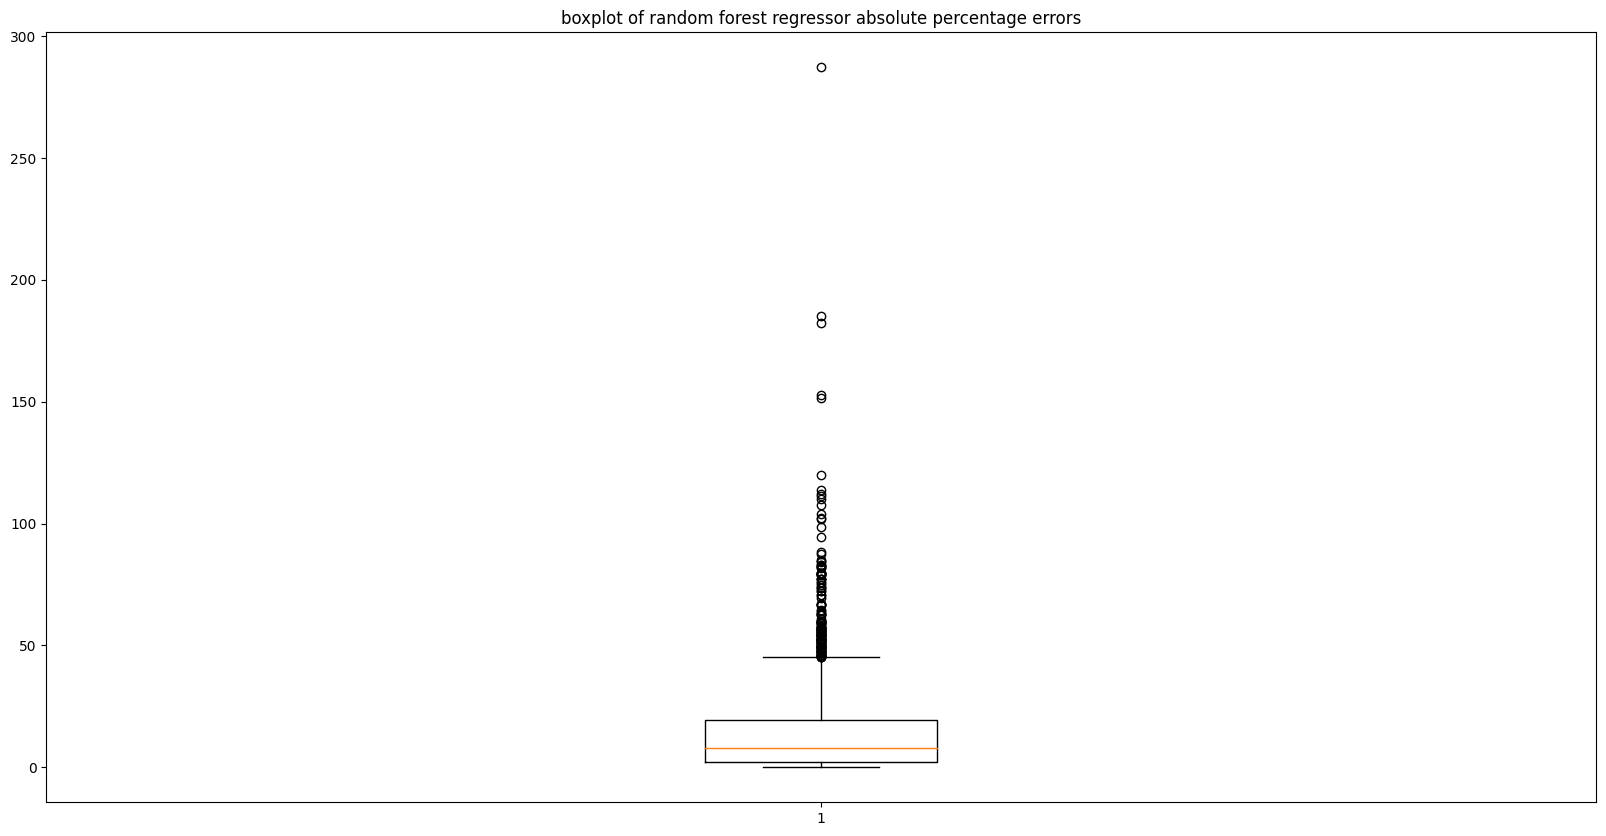

In [22]:
import matplotlib.pyplot as plt
import numpy as np
errors = np.abs((Y_test-rfr_pred)/Y_test)*100
plt.figure(figsize=(20,10))
plt.title('boxplot of random forest regressor absolute percentage errors')
plt.boxplot(errors)

In [23]:
pred = list(rfr_pred)
Y = list(Y_test)
all = pd.DataFrame()
all['model'] = X_test['model']
all['makes'] = X_test['make']
all['pred'] = pred
all['real'] = Y
all['error'] = (np.abs(np.subtract(all['real'],all['pred'])/all['real']))*100
all.head()
high = all.loc[all['error']>100]
low = all.loc[all['error']<=5]
print('the average price for rows with errors below 5% is {}$'.format(round(low['real'].mean()),2))
print('the average price for rows with errors above 100% is {}$'.format(round(high['real'].mean()),2))
print('the average price for all rows in the data is {}$'.format(round(all['real'].mean()),2))

the average price for rows with errors below 5% is 11433$
the average price for rows with errors above 100% is 5035$
the average price for all rows in the data is 10710$


(array([6.118e+03, 5.053e+03, 1.663e+03, 6.130e+02, 9.800e+01, 5.400e+01,
        4.000e+00, 2.000e+00, 0.000e+00, 2.000e+00]),
 array([1.00000e+00, 7.59710e+03, 1.51932e+04, 2.27893e+04, 3.03854e+04,
        3.79815e+04, 4.55776e+04, 5.31737e+04, 6.07698e+04, 6.83659e+04,
        7.59620e+04]),
 <BarContainer object of 10 artists>)

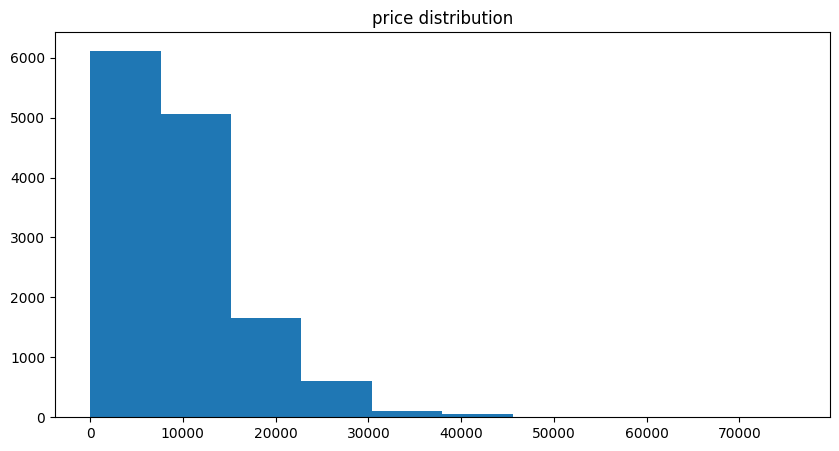

In [24]:
plt.figure(figsize=(10,5))
plt.title('price distribution')
plt.hist(data2['price'])

Above we see that the rows that didn't have a model or where the model wasn't properly extracted, had a higher mean absolute percentage error. And below we take a look at the mean absolute percentage error for each make. Moto bikes have the largest by far with an error of over 30%. Vespa and Zero were the only manufacturers with a mean absolute percentage error above 20%.

In [25]:
harley = all.loc[all['makes']=='harley']
aprilia = all.loc[all['makes']=='aprilia']
vespa = all.loc[all['makes']=='vespa']
moto = all.loc[all['makes']=='moto']
husqvarna = all.loc[all['makes']=='husqvarna']
ducati = all.loc[all['makes']=='ducati']
suzuki = all.loc[all['makes']=='suzuki']
yamaha = all.loc[all['makes']=='yamaha']
honda = all.loc[all['makes']=='honda']
kawasaki = all.loc[all['makes']=='kawasaki']
bmw = all.loc[all['makes']=='bmw']
ktm = all.loc[all['makes']=='ktm']
indian = all.loc[all['makes']=='indian']
victory = all.loc[all['makes']=='victory']
royal = all.loc[all['makes']=='royal']
moto = all.loc[all['makes']=='moto']
canam = all.loc[all['makes']=='can-am']
triumph = all.loc[all['makes']=='triumph']
zero = all.loc[all['makes']=='zero']
print('zero error was {}%'.format(round(zero['error'].mean()),2))
print('triumph error was {}%'.format(round(triumph['error'].mean()),2))
print('canam error was {}%'.format(round(canam['error'].mean()),2))
print('royal error was {}%'.format(round(royal['error'].mean()),2))
print('indian error was {}%'.format(round(indian['error'].mean()),2))
print('ktm error was {}%'.format(round(ktm['error'].mean()),2))
print('bmw error was {}%'.format(round(bmw['error'].mean()),2))
print('kawasaki error was {}%'.format(round(kawasaki['error'].mean()),2))
print('honda error was {}%'.format(round(honda['error'].mean()),2))
print('yamaha error was {}%'.format(round(yamaha['error'].mean()),2))
print('suzuki error was {}%'.format(round(suzuki['error'].mean()),2))
print('ducati error was {}%'.format(round(ducati['error'].mean()),2))
print('husqvarna error was {}%'.format(round(husqvarna['error'].mean()),2))
print('moto error was {}%'.format(round(moto['error'].mean()),2))
print('vespa error was {}%'.format(round(vespa['error'].mean()),2))
print('aprilia error was {}%'.format(round(aprilia['error'].mean()),2))
print('harley error was {}%'.format(round(harley['error'].mean()),2))

zero error was 28%
triumph error was 16%
canam error was 16%
royal error was 4%
indian error was 16%
ktm error was 16%
bmw error was 16%
kawasaki error was 17%
honda error was 13%
yamaha error was 12%
suzuki error was 14%
ducati error was 14%
husqvarna error was 19%
moto error was 31%
vespa error was 20%
aprilia error was 19%
harley error was 13%


I had previously stated earlier that this model tends to not do well with lower priced motorcycles. We see that in action here as our instances here of errors of 100% or more had an average of 5,000 dollars of the price of the motorcycle they corresponded to, whereas the average motorcycle price for the whole dataset was 11,370 dollars, a rather large difference. Before removing all motorcycles priced at 3000 dollars or below my mean absolute percent error was over 300.

Here we see that the percentage of motorcycles with a pricing error of 25 percent or more is about 18 percent, this is problematic of course, however it does imply that about 82% of motorcycles would be priced without any egregious errors.

In [26]:

above_25 = all.loc[all['error']>25]
length_high = len(above_25)
length_total = len(all)
percentage = (length_high/length_total)*100

print('the percentage of motorcycles with an absolute percent error of 25 or more is {}'.format(round((percentage),2)))

the percentage of motorcycles with an absolute percent error of 25 or more is 17.99


While the results obtained in this project certainly aren't ideal we can at least say that if a potential customer or seller have all the specs for their motorcycle on hand to input, then this model will on average produce an output with a 14% absolute percent error on average, and 82 percent of motorcycles will be priced with a 25% mean absolute error or less.

The next steps for this attempt at accurate motorcycle pricing would be to try to scrape more data, perhaps from multiple websites so as to get a more universal price estimate. This could also allow for the creation of a separate model for instances of motorcycles priced at 3000$ or less.